In [34]:
import numpy as np
import os
import cv2
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Load MNIST images and preprocess
image_dir = "./"  # Change this to the directory containing your MNIST images
image_files = sorted([file for file in os.listdir(image_dir) if file.endswith('.png')])

images = []
for file in image_files:
    img = cv2.imread(os.path.join(image_dir, file), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))  # Resize images to 28x28
    img = img.astype('float32') / 255.0  # Normalize pixel values between 0 and 1
    images.append(img)

images = np.array(images)
images = np.expand_dims(images, axis=-1)  # Add channel dimension



In [7]:
import numpy as np
import os
import cv2
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Load MNIST images and preprocess
image_dir = "./"  # Change this to the directory containing your MNIST images
image_files = sorted([file for file in os.listdir(image_dir) if file.endswith('.png')])

images = []
for file in image_files:
    img = cv2.imread(os.path.join(image_dir, file), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))  # Resize images to 28x28
    img = img.astype('float32') / 255.0  # Normalize pixel values between 0 and 1
    images.append(img)

images = np.array(images)
images = np.expand_dims(images, axis=-1)  # Add channel dimension
# Define the convolutional autoencoder architecture with a deeper encoder
input_img = Input(shape=(32, 32, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder (can remain the same)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model (compile and train as before)
# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder

# Train the autoencoder
autoencoder.fit(images, images, epochs=50, batch_size=128, shuffle=True)

# Reconstruct images using the trained autoencoder
reconstructed_images = autoencoder.predict(images)


# Extract features using the encoder part of the autoencoder
encoder = Model(input_img, encoded)
encoded_images = encoder.predict(images)

# Extracted features (encoded images) are stored in the 'encoded_images' array


Epoch 1/50
4/4 [==============================] - 2s 66ms/step - loss: 0.6925
Epoch 2/50
4/4 [==============================] - 0s 62ms/step - loss: 0.6746
Epoch 3/50
4/4 [==============================] - 0s 68ms/step - loss: 0.6502
Epoch 4/50
4/4 [==============================] - 0s 69ms/step - loss: 0.6172
Epoch 5/50
4/4 [==============================] - 0s 68ms/step - loss: 0.5905
Epoch 6/50
4/4 [==============================] - 0s 65ms/step - loss: 0.5671
Epoch 7/50
4/4 [==============================] - 0s 66ms/step - loss: 0.5345
Epoch 8/50
4/4 [==============================] - 0s 65ms/step - loss: 0.5021
Epoch 9/50
4/4 [==============================] - 0s 68ms/step - loss: 0.4653
Epoch 10/50
4/4 [==============================] - 0s 67ms/step - loss: 0.4220
Epoch 11/50
4/4 [==============================] - 0s 63ms/step - loss: 0.3734
Epoch 12/50
4/4 [==============================] - 0s 63ms/step - loss: 0.3267
Epoch 13/50
4/4 [==============================] - 0s 67ms/st

In [26]:
print(encoded_images.shape)

(500, 4, 4, 4)


In [24]:
# ... (previous code)

# Define the convolutional autoencoder architecture with a deeper encoder and reshaped input
input_img = Input(shape=(32, 32, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder (can remain the same)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model (compile and train as before)

# Extract features using the encoder part of the autoencoder
encoder = Model(input_img, encoded)
encoded_images = encoder.predict(images)


# Autoencoder model (compile and train as before)
# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder

# Train the autoencoder
autoencoder.fit(images, images, epochs=50, batch_size=128, shuffle=True)

# Reconstruct images using the trained autoencoder
reconstructed_images = autoencoder.predict(images)

# Extracted features (encoded images) are stored in the 'encoded_images' array


16/16 [==============================] - 0s 7ms/step
Epoch 1/50
4/4 [==============================] - 2s 68ms/step - loss: 0.6784
Epoch 2/50
4/4 [==============================] - 0s 67ms/step - loss: 0.6419
Epoch 3/50
4/4 [==============================] - 0s 74ms/step - loss: 0.5893
Epoch 4/50
4/4 [==============================] - 0s 71ms/step - loss: 0.5652
Epoch 5/50
4/4 [==============================] - 0s 72ms/step - loss: 0.5556
Epoch 6/50
4/4 [==============================] - 0s 66ms/step - loss: 0.5337
Epoch 7/50
4/4 [==============================] - 0s 72ms/step - loss: 0.5203
Epoch 8/50
4/4 [==============================] - 0s 67ms/step - loss: 0.5027
Epoch 9/50
4/4 [==============================] - 0s 72ms/step - loss: 0.4832
Epoch 10/50
4/4 [==============================] - 0s 74ms/step - loss: 0.4635
Epoch 11/50
4/4 [==============================] - 0s 70ms/step - loss: 0.4388
Epoch 12/50
4/4 [==============================] - 0s 68ms/step - loss: 0.4114
Epoch 13

In [32]:
# ... (previous code)

# Define the convolutional autoencoder architecture with a deeper encoder and reshaped input
input_img = Input(shape=(32, 32, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder (can remain the same)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model (compile and train as before)

# Extract features using the encoder part of the autoencoder
encoder = Model(input_img, encoded)
encoded_images = encoder.predict(images)


# Autoencoder model (compile and train as before)
# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder

# Train the autoencoder
autoencoder.fit(images, images, epochs=50, batch_size=128, shuffle=True)

# Reconstruct images using the trained autoencoder
reconstructed_images = autoencoder.predict(images)

# Extracted features (encoded images) are stored in the 'encoded_images' array


16/16 [==============================] - 0s 6ms/step
Epoch 1/50
4/4 [==============================] - 2s 73ms/step - loss: 0.6908
Epoch 2/50
4/4 [==============================] - 0s 63ms/step - loss: 0.6835
Epoch 3/50
4/4 [==============================] - 0s 68ms/step - loss: 0.6734
Epoch 4/50
4/4 [==============================] - 0s 67ms/step - loss: 0.6594
Epoch 5/50
4/4 [==============================] - 0s 64ms/step - loss: 0.6405
Epoch 6/50
4/4 [==============================] - 0s 64ms/step - loss: 0.6158
Epoch 7/50
4/4 [==============================] - 0s 64ms/step - loss: 0.5866
Epoch 8/50
4/4 [==============================] - 0s 62ms/step - loss: 0.5562
Epoch 9/50
4/4 [==============================] - 0s 64ms/step - loss: 0.5308
Epoch 10/50
4/4 [==============================] - 0s 61ms/step - loss: 0.5110
Epoch 11/50
4/4 [==============================] - 0s 68ms/step - loss: 0.4927
Epoch 12/50
4/4 [==============================] - 0s 68ms/step - loss: 0.4726
Epoch 13

16/16 [==============================] - 0s 11ms/step


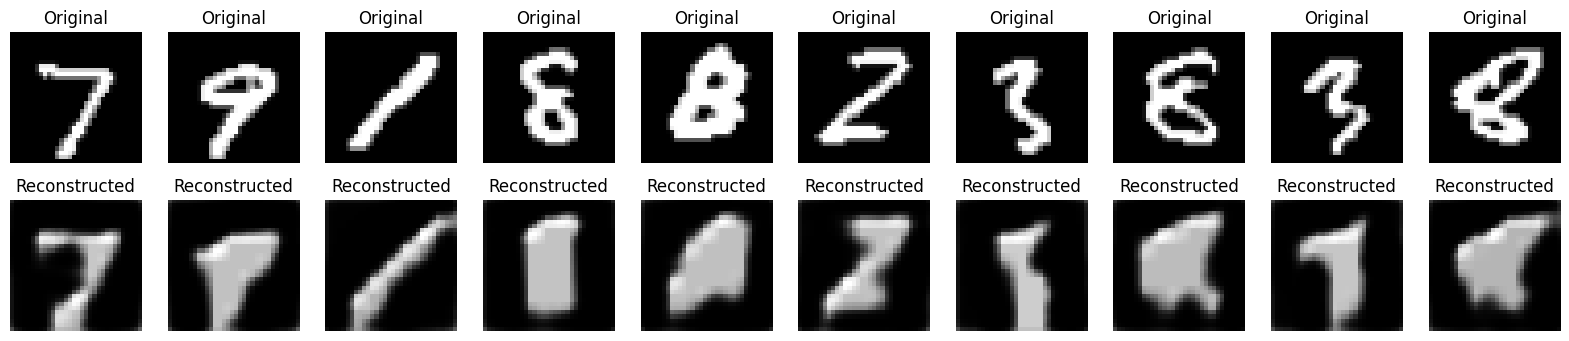

In [33]:
import matplotlib.pyplot as plt

# ... (previous code)

# Reconstruct images using the trained autoencoder
reconstructed_images = autoencoder.predict(images)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i].reshape(32, 32), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(32, 32), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()
